Import necessary libraries

In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Load the dataset and take a quick look at it

In [246]:
dataset = pd.read_csv("/Users/ansh/Downloads/Pollution_dataset.csv")
dataset.rename(columns = {"Air Quality": "Air_Quality"}, inplace = True)  # Fix column name typo

Separate the features from the target variable

In [248]:
features_variable = dataset.iloc[:, :-1]  # All columns except the last one (target)
target_variable = dataset.iloc[:, -1]    # The last column is our target variable

Split the data into training and testing sets

In [250]:
# 70% of the data will be used for training, and 30% will be used for testing
X_train, X_test, Y_train, Y_test = train_test_split(features_variable, target_variable, test_size=0.3, random_state=11)

Scale the features

In [252]:
Scaler = StandardScaler()
X_train_Scaled = Scaler.fit_transform(X_train)  # Fit and scale on training data
X_test_Scaled = Scaler.transform(X_test)  # Only transform test data, don't fit again

Train a Logistic Regression model

In [254]:
model = LogisticRegression(max_iter=1000)  # Increase the iterations to avoid convergence warnings
model_fit = model.fit(X_train_Scaled, Y_train)  # Train the model on the scaled training data
model_pred = model.predict(X_test_Scaled)  # Make predictions on the test data

Evaluate the Logistic Regression model

In [256]:
# This will give us a detailed performance report (precision, recall, F1-score, etc.)
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, model_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       605
   Hazardous       0.89      0.88      0.89       155
    Moderate       0.93      0.97      0.95       433
        Poor       0.90      0.85      0.87       307

    accuracy                           0.95      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.95      0.95      0.95      1500



Train a Random Forest model (a more complex model)

In [258]:
rf_model = RandomForestClassifier(random_state=42)  # Using a random state for reproducibility
rf_model_fit = rf_model.fit(X_train_Scaled, Y_train)  # Train Random Forest model
rf_model_pred = rf_model_fit.predict(X_test_Scaled)  # Predict on test data

Evaluate Random Forest model performance

In [260]:
print("Random Forest Classification Report:")
print(classification_report(Y_test, rf_model_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       605
   Hazardous       0.92      0.86      0.89       155
    Moderate       0.95      0.98      0.97       433
        Poor       0.90      0.89      0.90       307

    accuracy                           0.96      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.96      0.96      0.96      1500



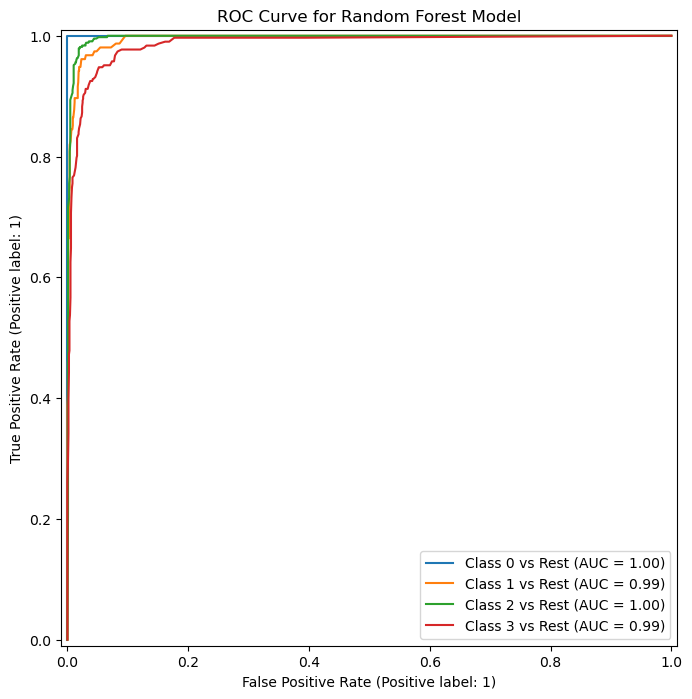

In [261]:
# Plot ROC curve for the Random Forest model (multi-class)
# Binarize the target variable for multi-class ROC
Y_test_binarized = label_binarize(Y_test, classes=np.unique(target_variable))
rf_model_proba = rf_model_fit.predict_proba(X_test_Scaled)

# Number of classes
n_classes = Y_test_binarized.shape[1]

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        Y_test_binarized[:, i],
        rf_model_proba[:, i],
        name=f"Class {i} vs Rest",
        ax=plt.gca()
    )

plt.title("ROC Curve for Random Forest Model")
plt.legend(loc="lower right")
plt.show()